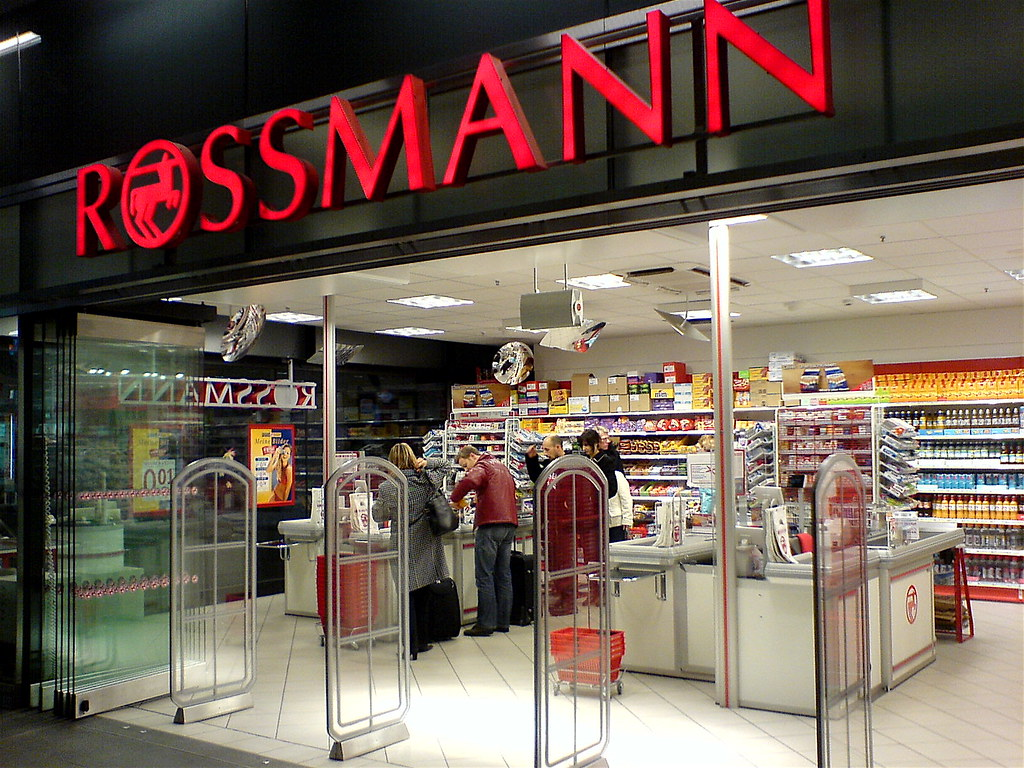

# Problem Defination

Rossmann is challenging you to predict **6 weeks of daily sales** for **1,115 stores** located across Germany

## Dataset
| Field                        | Description |
|-----------------------------|-------------|
| **Id**                      | An Id that represents a (Store, Date) duple within the test set. |
| **Store**                   | A unique Id for each store. |
| **Sales**                   | The turnover for any given day (this is what you are predicting). |
| **Customers**               | The number of customers on a given day. |
| **Open**                    | Indicator for whether the store was open: `0 = closed`, `1 = open`. |
| **StateHoliday**            | Indicates a state holiday: `a = public holiday`, `b = Easter holiday`, `c = Christmas`, `0 = None`. Most stores are closed on state holidays. |
| **SchoolHoliday**           | Indicates if the (Store, Date) was affected by public school closures. |
| **StoreType**               | Differentiates between 4 different store models: `a`, `b`, `c`, `d`. |
| **Assortment**              | Describes assortment level: `a = basic`, `b = extra`, `c = extended`. |
| **CompetitionDistance**     | Distance in meters to the nearest competitor store. |
| **CompetitionOpenSinceMonth / Year** | Approximate month and year when the nearest competitor was opened. |
| **Promo**                   | Indicates whether a store is running a promo on that day. |
| **Promo2**                  | Indicates if the store is part of a continuous promotion: `0 = not participating`, `1 = participating`. |
| **Promo2SinceYear / Week**  | The year and calendar week when the store started participating in Promo2. |
| **PromoInterval**           | Months when Promo2 promotions start, e.g., `"Feb,May,Aug,Nov"` means rounds start in those months. |

# Import Libraries

In [1]:
#data Manipulation
import numpy as np
import pandas as pd
from datetime import datetime

#plotting and visualizations
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

# Load the dataset

In [2]:
#The training Set
df_train = pd.read_csv("../data/train.csv",sep=',', parse_dates=['Date'])

C:\Users\USER\AppData\Local\Temp\ipykernel_24944\3353393535.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv("../data/train.csv",sep=',', parse_dates=['Date'])


### basic EDA

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


In [4]:
df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
df_train.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [6]:
df_train.describe()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,2014-04-11 01:30:42.846061824,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
min,1.000000e+00,1.000000e+00,2013-01-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,2013-08-17 00:00:00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,2014-04-02 00:00:00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,2014-12-12 00:00:00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,2015-07-31 00:00:00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01


In [7]:
df_train['Date'].min(),df_train['Date'].max(),

(Timestamp('2013-01-01 00:00:00'), Timestamp('2015-07-31 00:00:00'))

It seems our data span a little over two years and a half: need to make sure that there is no missing date/ missing timestamps

In [8]:
len(df_train['Date'].unique())

942

In [9]:
full_range = pd.date_range(start=df_train.Date.min(), end=df_train.Date.max(), freq='D')  # 'D' = daily frequency
len(full_range)

942

In [10]:
missing_dates = full_range.difference(df_train.Date)
print("Missing dates:", missing_dates)

Missing dates: DatetimeIndex([], dtype='datetime64[ns]', freq=None)


In [11]:
len(df_train['Store'].unique())

1115

In [12]:
df_train.shape

(1017209, 9)

There is no missing timestamps: but our data is gathered to be store-day combinations, meaning each of the 1115 report their sales each day for 942 days.

1115*942 = 1,050,330 row,

while our data is 1,017,209 row,

so we have 33,121 missing combinations.

### resampling to see missing data

In [13]:
df_train['Date'] = pd.to_datetime(df_train['Date'])

# Group by Store and apply resample
df_resampled = (
    df_train.groupby('Store')
      .apply(lambda x: x.set_index('Date').resample('D').asfreq())
)


In [14]:
missing = df_resampled[df_resampled['Sales'].isna()]
print(missing.head())
print(len(missing))


                  Store  DayOfWeek  Sales  Customers  Open  Promo  \
Store Date                                                          
13    2014-07-01    NaN        NaN    NaN        NaN   NaN    NaN   
      2014-07-02    NaN        NaN    NaN        NaN   NaN    NaN   
      2014-07-03    NaN        NaN    NaN        NaN   NaN    NaN   
      2014-07-04    NaN        NaN    NaN        NaN   NaN    NaN   
      2014-07-05    NaN        NaN    NaN        NaN   NaN    NaN   

                 StateHoliday  SchoolHoliday  
Store Date                                    
13    2014-07-01          NaN            NaN  
      2014-07-02          NaN            NaN  
      2014-07-03          NaN            NaN  
      2014-07-04          NaN            NaN  
      2014-07-05          NaN            NaN  
33120


In [15]:
missing[:300]

Store  DayOfWeek  Sales  Customers  Open  Promo  \
Store Date                                                          
13    2014-07-01    NaN        NaN    NaN        NaN   NaN    NaN   
      2014-07-02    NaN        NaN    NaN        NaN   NaN    NaN   
      2014-07-03    NaN        NaN    NaN        NaN   NaN    NaN   
      2014-07-04    NaN        NaN    NaN        NaN   NaN    NaN   
      2014-07-05    NaN        NaN    NaN        NaN   NaN    NaN   
...                 ...        ...    ...        ...   ...    ...   
20    2014-10-20    NaN        NaN    NaN        NaN   NaN    NaN   
      2014-10-21    NaN        NaN    NaN        NaN   NaN    NaN   
      2014-10-22    NaN        NaN    NaN        NaN   NaN    NaN   
      2014-10-23    NaN        NaN    NaN        NaN   NaN    NaN   
      2014-10-24    NaN        NaN    NaN        NaN   NaN    NaN   

                 StateHoliday  SchoolHoliday  
Store Date                                    
13    2014-07-01          NaN            NaN  
      2014-07-02          NaN            NaN  
      2014-07-03          NaN            NaN  
      2014-07-04          NaN            NaN  
      2014-07-05          NaN            NaN  
...                       ...            ...  
20    2014-10-20          NaN            NaN  
      2014-10-21          NaN            NaN  
      2014-10-22          NaN            NaN  
      2014-10-23          NaN            NaN  
      2014-10-24          NaN            NaN  

[300 rows x 8 columns]

In [16]:
import pandas as pd
import numpy as np

df = df_train.copy()

df['Date'] = pd.to_datetime(df['Date'])

all_stores = df['Store'].unique()
all_dates = pd.date_range(start=df['Date'].min(), end=df['Date'].max(), freq='D')

# create full cartesian product of stores × dates
full_index = pd.MultiIndex.from_product([all_stores, all_dates], names=['Store', 'Date'])

# reindex your original data to this full index
df.set_index(['Store', 'Date'], inplace=True)
df_full = df.reindex(full_index).reset_index()


In [17]:
df_full.shape

(1050330, 9)

In [18]:

df_full.head(2)

,Store,Date,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,2013-01-01,2.0,0.0,0.0,0.0,0.0,a,1.0
1,1,2013-01-02,3.0,5530.0,668.0,1.0,0.0,0,1.0


In [19]:
df_full['missing'] = df_full['Sales'].isna()
missing_count_per_store = df_full.groupby('Store')['missing'].sum()
print(missing_count_per_store.sort_values(ascending=False))


Store
706     184
191     184
172     184
977     184
174     184
       ... 
409       0
410       0
411       0
414       0
1115      0
Name: missing, Length: 1115, dtype: int64


In [20]:
print(f"Number of stores with missing values: {(missing_count_per_store > 0).sum()}")


Number of stores with missing values: 181


In [21]:
missing_rows = df_full[df_full['Sales'].isna()]
missing_dates_by_store = missing_rows.groupby('Store')['Date'].apply(list)
print(missing_dates_by_store.head())


Store
13    [2014-07-01 00:00:00, 2014-07-02 00:00:00, 201...
20    [2014-07-01 00:00:00, 2014-07-02 00:00:00, 201...
22    [2014-07-01 00:00:00, 2014-07-02 00:00:00, 201...
32    [2014-07-01 00:00:00, 2014-07-02 00:00:00, 201...
36    [2014-07-01 00:00:00, 2014-07-02 00:00:00, 201...
Name: Date, dtype: object


In [22]:
list_missing_stores = missing_dates_by_store.index.to_list()

In [23]:
missing_periods = missing_rows.groupby('Store')['Date'].agg(['min', 'max'])
print(missing_periods.head())

             min        max
Store                      
13    2014-07-01 2014-12-31
20    2014-07-01 2014-12-31
22    2014-07-01 2014-12-31
32    2014-07-01 2014-12-31
36    2014-07-01 2014-12-31


In [24]:
df_full.isna().sum()

Store                0
Date                 0
DayOfWeek        33121
Sales            33121
Customers        33121
Open             33121
Promo            33121
StateHoliday     33121
SchoolHoliday    33121
missing              0
dtype: int64

In [25]:
df_full.duplicated().sum()

0

In [26]:
missing_stores_df = df_full[
    (df_full['Store'] == 13) &
    (df_full['Date'] >= "2014-07-01") &
    (df_full['Date'] <= "2014-12-31")
]


In [27]:
missing_stores_df

,Store,Date,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,missing
11850,13,2014-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
11851,13,2014-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
11852,13,2014-07-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
11853,13,2014-07-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
11854,13,2014-07-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...
12029,13,2014-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
12030,13,2014-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
12031,13,2014-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
12032,13,2014-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [28]:
missing_stores_df.loc[missing_stores_df['missing'], ['Open', 'Sales', 'Customers']] = 0


In [29]:
missing_stores_df.head()

,Store,Date,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,missing
11850,13,2014-07-01,NaN,0.0,0.0,0.0,NaN,NaN,NaN,True
11851,13,2014-07-02,NaN,0.0,0.0,0.0,NaN,NaN,NaN,True
11852,13,2014-07-03,NaN,0.0,0.0,0.0,NaN,NaN,NaN,True
11853,13,2014-07-04,NaN,0.0,0.0,0.0,NaN,NaN,NaN,True
11854,13,2014-07-05,NaN,0.0,0.0,0.0,NaN,NaN,NaN,True


In [30]:
# data preprocessing 
df_full.loc[df_full['missing'], ['Open', 'Sales', 'Customers']] = 0


There are 181 stores out of 1115 stores missing the data in the period from "2014-07-01 ::2014-12-31" each missing a 184 timestamp: 33,121 rows  approximatly `16%` of the data

The missing period is exact and consistent across stores.

That means it's likely:

- Data wasn't collected or logged.

- Stores may have been closed or inactive 

Either way, this is structured missingness, not random.





- Some models can handle this missing: Prophet,ML Models like XGBoost, LightGBM
- Some can't and need filling/Dropping like ETS/ARIMA

Possible solutions:

- Use Grouped Averages (e.g., DayOfWeek Mean per Store)
- Use Model-Based Forecasting to Fill the Gap
  - Train a model (e.g., ARIMA/Prophet) on each store’s historical data up to June 2014.

  - Forecast for the 6 months missing.

  - Insert predicted values into the missing section.

  - **Pros**:

    - Respects temporal structure.

    - More accurate for long gaps.
  - **Cons**:
    - Expensive to do per-store (may need batching or automation).


- Drop missing & use indicators (which will be likely doing)




### rolling

In [31]:
# Sort by date before applying
df_sorted = df_full.sort_values(['Store', 'Date'])

# Apply 7-day rolling mean of Sales per store
df_sorted['Sales_rolling7'] = (
    df_sorted.groupby('Store')['Sales']
    .transform(lambda x: x.rolling(window=7, min_periods=1).mean())
)

# For 30-day window
df_sorted['Sales_rolling30'] = (
    df_sorted.groupby('Store')['Sales']
    .transform(lambda x: x.rolling(window=30, min_periods=1).mean())
)


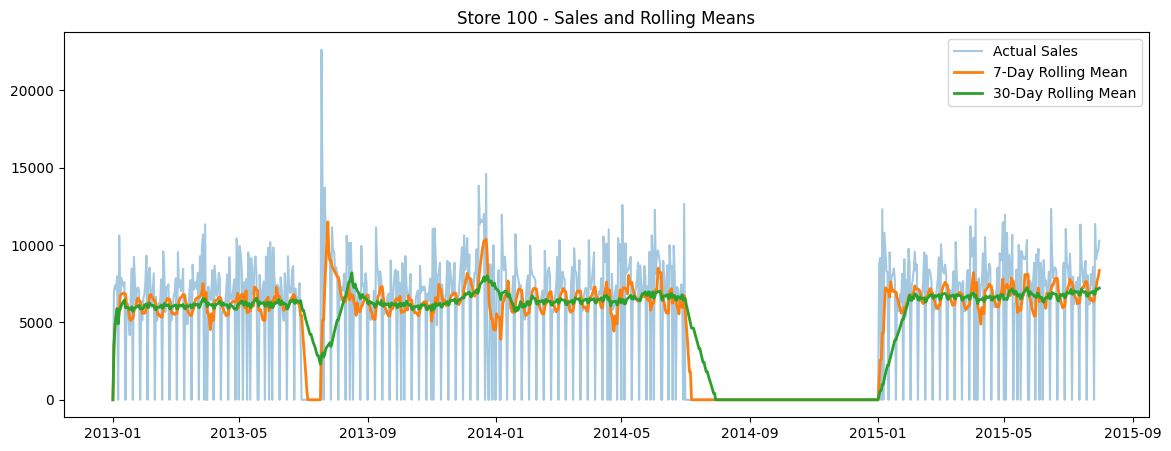

In [32]:
import matplotlib.pyplot as plt

store_id = 100  # choose one store
df_store = df_sorted[df_sorted['Store'] == store_id]

plt.figure(figsize=(14, 5))
plt.plot(df_store['Date'], df_store['Sales'], label='Actual Sales', alpha=0.4)
plt.plot(df_store['Date'], df_store['Sales_rolling7'], label='7-Day Rolling Mean', linewidth=2)
plt.plot(df_store['Date'], df_store['Sales_rolling30'], label='30-Day Rolling Mean', linewidth=2)
plt.title(f'Store {store_id} - Sales and Rolling Means')
plt.legend()
plt.show()


In [33]:
import matplotlib.pyplot as plt

def compare_rolling_sales(df, store_id, window=7, sales_col='Sales'):
    """
    Plot raw sales and rolling mean sales for a specific store.

    Parameters:
    - df (pd.DataFrame): The full dataset with 'Store', 'Date', and 'Sales' columns.
    - store_id (int): Store ID to visualize.
    - window (int): Rolling window size (e.g., 7 for 7-day rolling average).
    - sales_col (str): The column name for sales (default='Sales').
    """
    df_store = df[df['Store'] == store_id].sort_values('Date')

    # Compute rolling mean
    rolling_col = f'{sales_col}_rolling_{window}'
    df_store[rolling_col] = df_store[sales_col].rolling(window=window, min_periods=1).mean()

    # Plot
    plt.figure(figsize=(14, 5))
    plt.plot(df_store['Date'], df_store[sales_col], label='Raw Sales', alpha=0.5)
    plt.plot(df_store['Date'], df_store[rolling_col], label=f'{window}-Day Rolling Mean', linewidth=2)
    plt.title(f'Store {store_id} - Raw Sales vs {window}-Day Rolling Mean')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


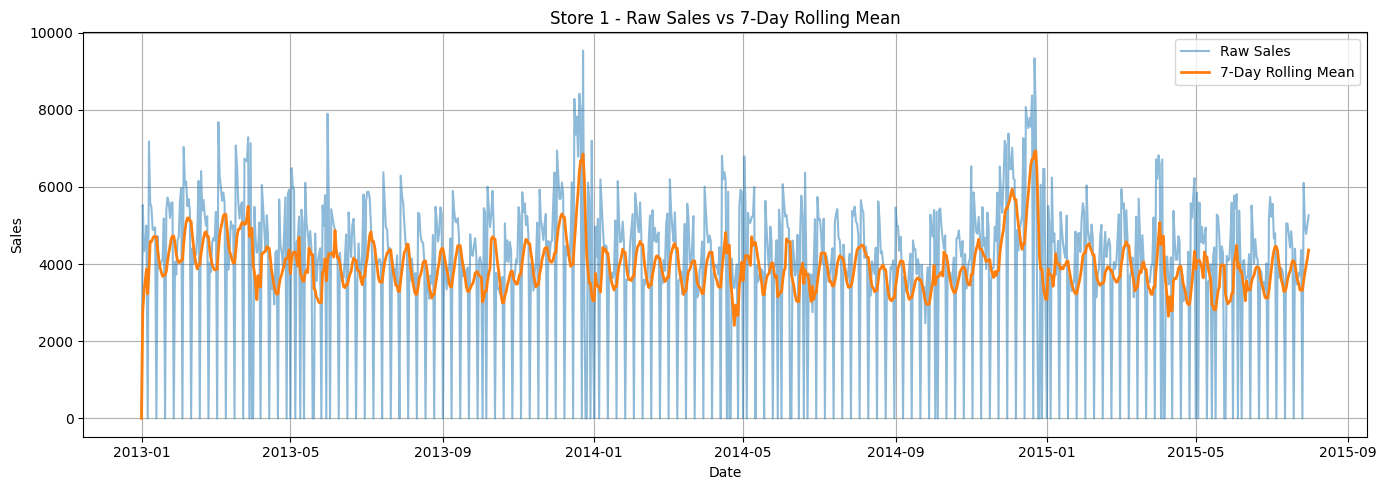

In [34]:
compare_rolling_sales(df=df_full, store_id=1, window=7)


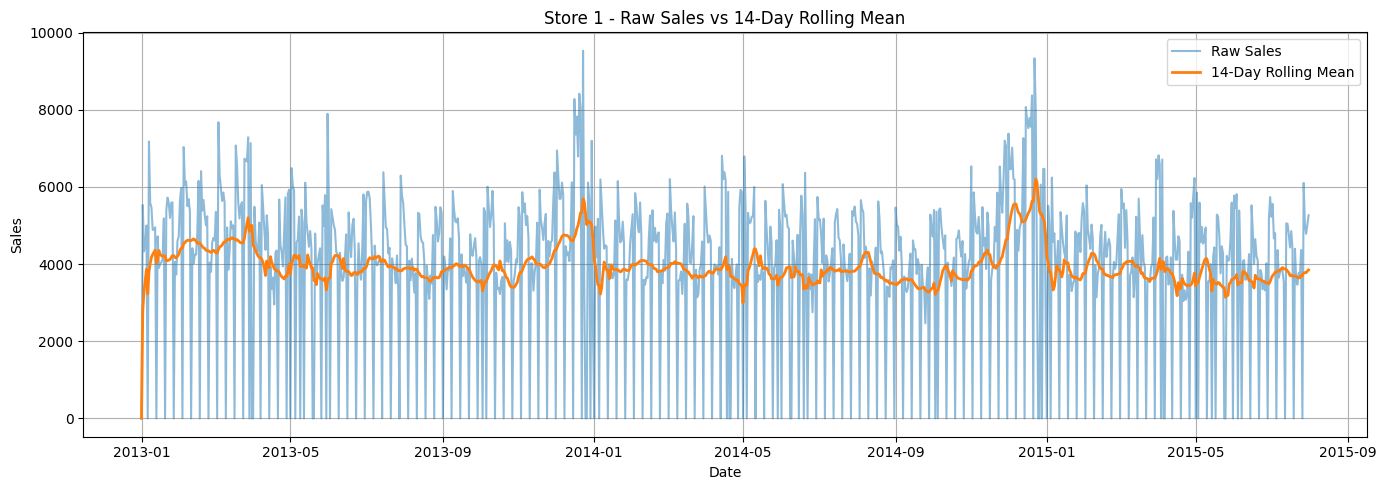

In [35]:
compare_rolling_sales(df=df_full, store_id=1, window=14)


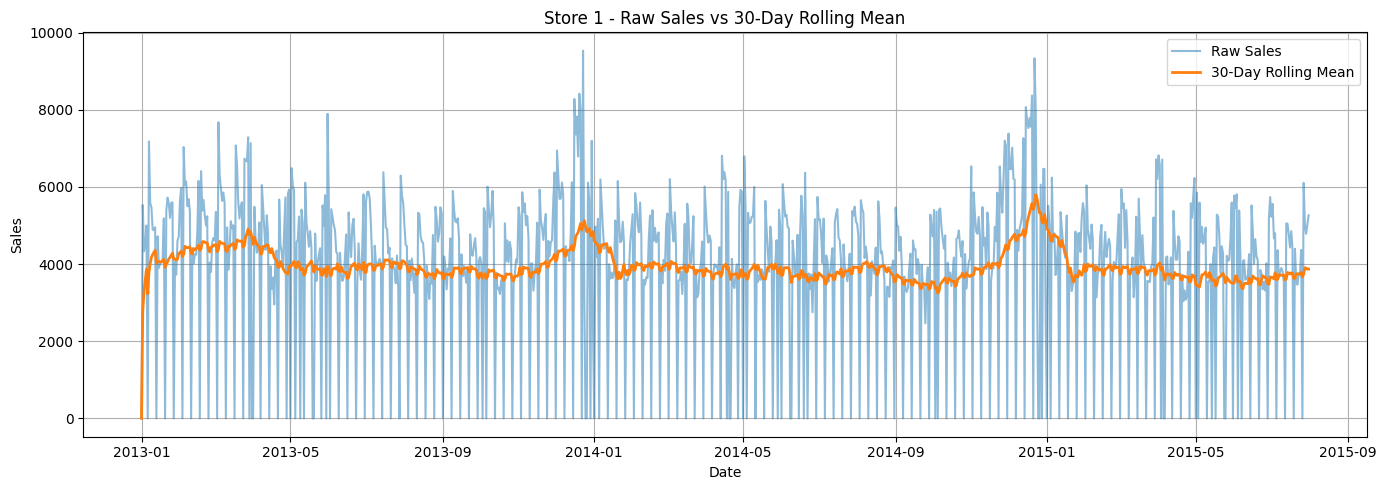

In [36]:
compare_rolling_sales(df=df_full, store_id=1, window=30)


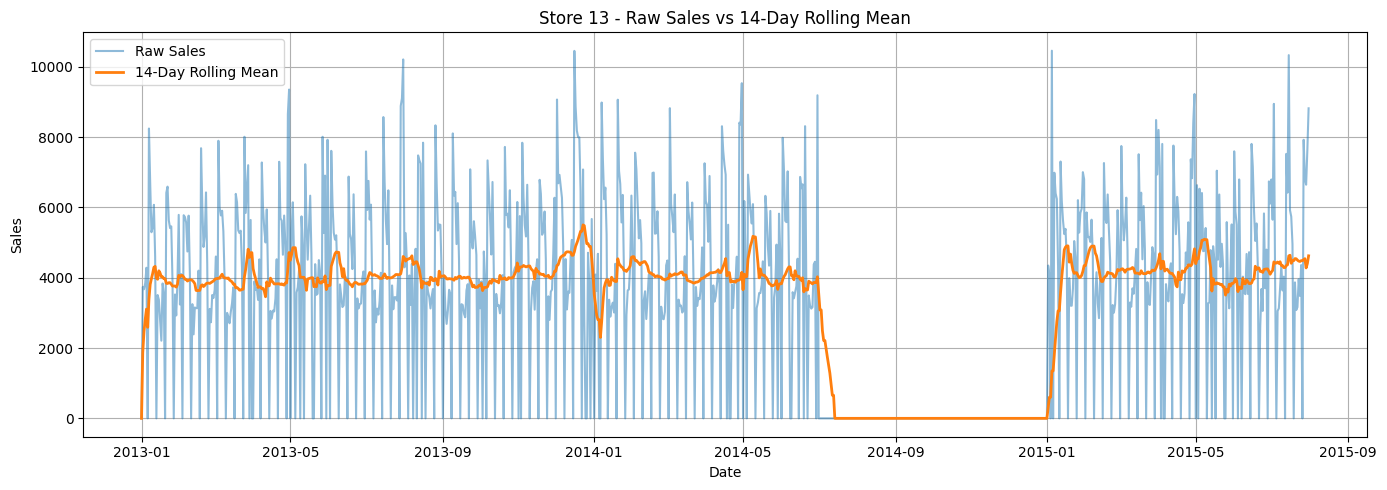

In [37]:
compare_rolling_sales(df=df_full, store_id=13, window=14)


### Correlation

In [38]:
df_sorted = df_full.sort_values(by=['Store', 'Date'])

# Group by store and create lag-1 sales
df_sorted['Sales_lag1'] = df_sorted.groupby('Store')['Sales'].shift(1)

valid_rows = df_sorted.dropna(subset=['Sales', 'Sales_lag1'])

# Calculate correlation overall (across all stores)
overall_corr = valid_rows['Sales'].corr(valid_rows['Sales_lag1'])
print(f"Overall correlation between Sales and lag-1 Sales: {overall_corr:.4f}")


Overall correlation between Sales and lag-1 Sales: 0.3263


In [39]:
# Function to compute correlation per group
def lag1_corr(group):
    group = group.sort_values('Date')
    return group['Sales'].corr(group['Sales'].shift(1))

store_corrs = df_full.groupby('Store').apply(lag1_corr)
print(store_corrs.sort_values(ascending=False))


Store
512     0.875380
1081    0.775793
530     0.666260
769     0.607206
733     0.548938
          ...   
599    -0.273691
458    -0.280918
1075   -0.299619
104    -0.299623
553    -0.306365
Length: 1115, dtype: float64


In [40]:
def compute_lag_correlation(df, lag=1):
    """
    Compute overall and per-store correlation between Sales and its lagged version.

    Parameters:
        df (pd.DataFrame): Input dataframe with at least 'Store', 'Date', and 'Sales' columns.
        lag (int): Number of days to lag.

    Returns:
        overall_corr (float): Correlation between Sales and Sales_lag{lag} across all stores.
        store_corrs (pd.Series): Correlation per store.
    """
    df_sorted = df.sort_values(by=['Store', 'Date']).copy()
    lag_col = f'Sales_lag{lag}'
    
    # Apply lag per store
    df_sorted[lag_col] = df_sorted.groupby('Store')['Sales'].shift(lag)
    
    # Drop rows with NaNs
    valid_rows = df_sorted.dropna(subset=['Sales', lag_col])
    
    # Overall correlation
    overall_corr = valid_rows['Sales'].corr(valid_rows[lag_col])
    print(f"Overall correlation between Sales and lag-{lag} Sales: {overall_corr:.4f}")
    
    # Per-store correlation
    def store_lag_corr(group):
        group = group.sort_values('Date')
        return group['Sales'].corr(group['Sales'].shift(lag))

    store_corrs = df.groupby('Store').apply(store_lag_corr).sort_values(ascending=False)
    
    return overall_corr, store_corrs


In [41]:
overall_corr, store_corrs = compute_lag_correlation(df_full, lag=1) #daily
store_corrs

Overall correlation between Sales and lag-1 Sales: 0.3263


Store
512     0.875380
1081    0.775793
530     0.666260
769     0.607206
733     0.548938
          ...   
599    -0.273691
458    -0.280918
1075   -0.299619
104    -0.299623
553    -0.306365
Length: 1115, dtype: float64

In [42]:
overall_corr, store_corrs = compute_lag_correlation(df_full, lag=7) #weekly
store_corrs

Overall correlation between Sales and lag-7 Sales: 0.6938


Store
512    0.860487
498    0.815941
172    0.805827
490    0.803469
36     0.802255
         ...   
543    0.223805
335    0.220818
693    0.187456
733    0.163816
494    0.039565
Length: 1115, dtype: float64

In [43]:
overall_corr, store_corrs = compute_lag_correlation(df_full, lag=14) # bi-weekly
store_corrs

Overall correlation between Sales and lag-14 Sales: 0.8026


Store
1081    0.845490
512     0.817379
490     0.817025
815     0.812529
498     0.809346
          ...   
769     0.536535
227     0.535825
848     0.512269
897     0.367137
733     0.342168
Length: 1115, dtype: float64

In [44]:
overall_corr, store_corrs = compute_lag_correlation(df_full, lag=30) # monthly
store_corrs

Overall correlation between Sales and lag-30 Sales: 0.2488


Store
512     0.676128
1081    0.498633
769     0.436692
530     0.417244
353     0.379063
          ...   
780    -0.273777
1014   -0.274929
892    -0.277703
187    -0.293432
124    -0.295563
Length: 1115, dtype: float64

**Lag-14 (biweekly)** correlation is consistently strong across stores. This suggests many stores exhibit biweekly sales cycles — possibly driven by pay periods, promotions, or demand trends repeating every two weeks.

### Closed but not a holiday

In [45]:
df_train[df_train['Open'] == 0]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
291,292,5,2015-07-31,0,0,0,1,0,1
875,876,5,2015-07-31,0,0,0,1,0,1
1406,292,4,2015-07-30,0,0,0,1,0,1
1990,876,4,2015-07-30,0,0,0,1,0,1
2521,292,3,2015-07-29,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [46]:
closed_store = df_train[(df_train['Open'] == 0) & (df_train['SchoolHoliday'] == 0)]
len(closed_store)
print(f"Number of times the stores were closed : {len(closed_store)}")

Number of times the stores were closed : 154553


In [47]:
closed_store_no_holiday= df_train[(df_train["Open"] == 0) &
         (df_train["StateHoliday"] == "0")
         &(df_train["SchoolHoliday"] == "0")].count()[0]
print(f"Number of times the stores closed without having a holiday: {closed_store_no_holiday}")

Number of times the stores closed without having a holiday: 0


C:\Users\USER\AppData\Local\Temp\ipykernel_24944\1139768953.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  closed_store_no_holiday= df_train[(df_train["Open"] == 0) &


In [48]:
closed_store_no_holiday= df_full[(df_full["Open"] == 0) &
         (df_full["StateHoliday"] == "0")
         &(df_full["SchoolHoliday"] == "0")].count()[0]
print(f"Number of times the stores closed without having a holiday: {closed_store_no_holiday}")

Number of times the stores closed without having a holiday: 0


C:\Users\USER\AppData\Local\Temp\ipykernel_24944\1579050605.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  closed_store_no_holiday= df_full[(df_full["Open"] == 0) &


After reading the descrition of the this task, Rossman clearly stated that they were undergoing refurbishments sometimes and had to close. Most probably those were the times this event was happening.

This can introduce bias to our models 

In [49]:
print(f"Percentage of closed stores for refurbishments {(closed_store_no_holiday/len(df_train)*100):.2f}%")

Percentage of closed stores for refurbishments 0.00%


In [50]:
import sys
import os
sys.path.append(os.path.abspath(".."))


### Distribution of sales

In [51]:
df_full.Sales.describe() 


count    1.050330e+06
mean     5.591748e+03
std      3.920795e+03
min      0.000000e+00
25%      3.411000e+03
50%      5.628000e+03
75%      7.769000e+03
max      4.155100e+04
Name: Sales, dtype: float64

we see here a minimum of 0 which means some stores even opened got 0 sales on some days

{'Mean': 5773.818972305593, 'Median': 5744.0}

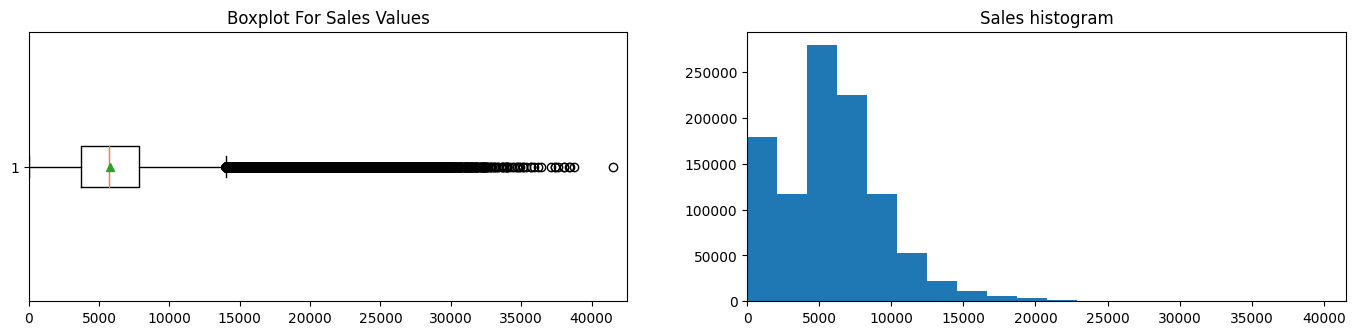

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(17,3.5))
axes[0].boxplot(df_train.Sales, showmeans=True,vert=False)
axes[0].set_xlim(0,max(df_train["Sales"]+1000))
axes[0].set_title('Boxplot For Sales Values')
axes[1].hist(df_train.Sales, cumulative=False, bins=20)
axes[1].set_title("Sales histogram")
axes[1].set_xlim((min(df_train.Sales), max(df_train.Sales)))

{"Mean":np.mean(df_train.Sales),"Median":np.median(df_train.Sales)}

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


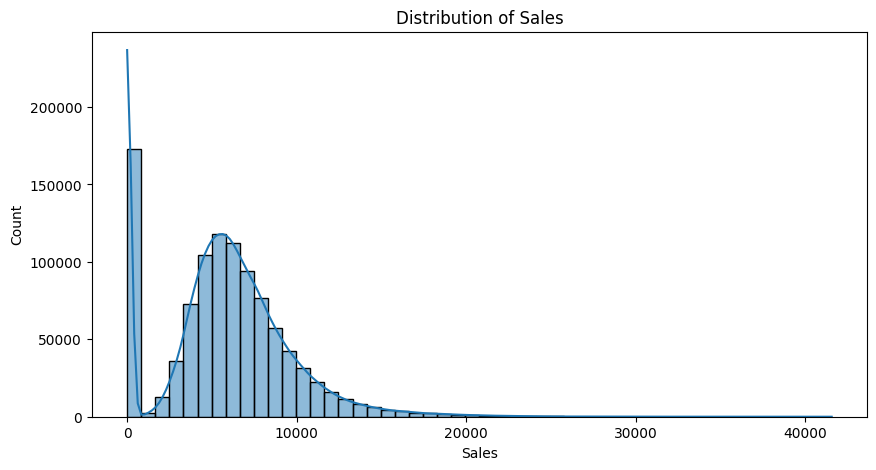

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df_train['Sales'], bins=50, kde=True)
plt.xlabel('Sales')
plt.ylabel('Count')
plt.title('Distribution of Sales')
plt.show()

### Distribution of customers

{'Mean': 633.1459464082602, 'Median': 609.0}

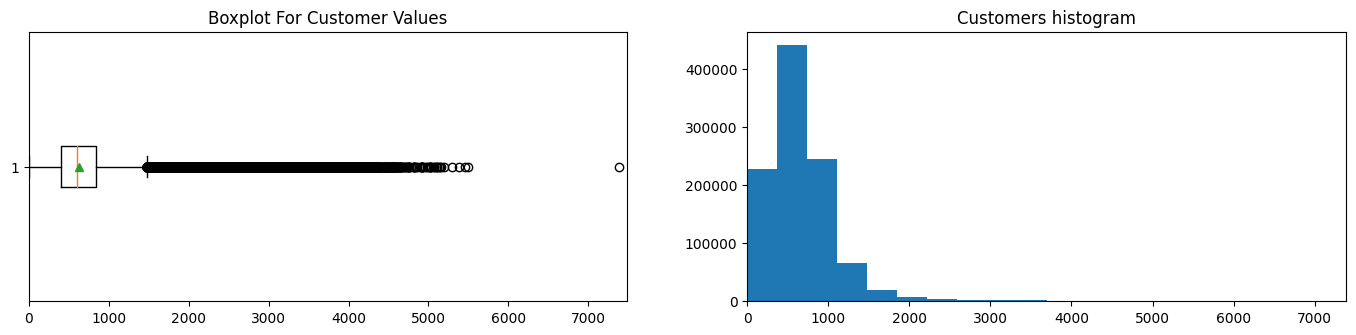

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(17,3.5))
axes[0].boxplot(df_train.Customers, showmeans=True,vert=False)
axes[0].set_xlim(0,max(df_train["Customers"]+100))
axes[0].set_title('Boxplot For Customer Values')
axes[1].hist(df_train.Customers, cumulative=False, bins=20)
axes[1].set_title("Customers histogram")
axes[1].set_xlim((min(df_train.Customers), max(df_train.Customers)))

{"Mean":np.mean(df_train.Customers),"Median":np.median(df_train.Customers)}

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


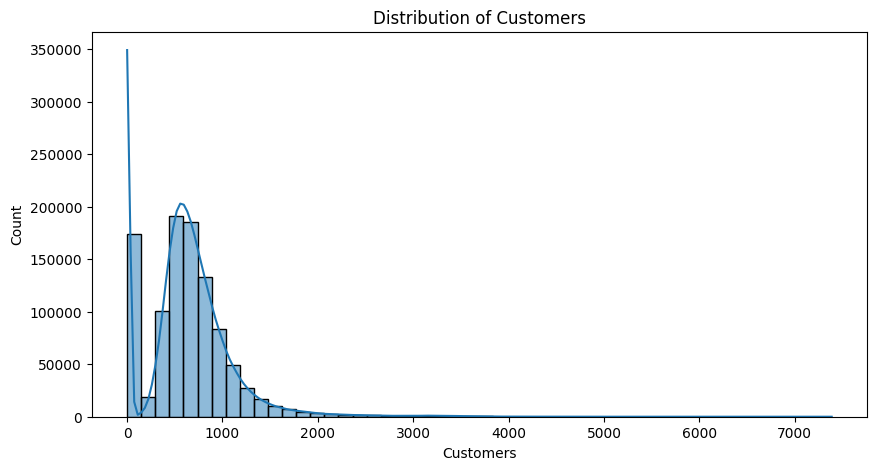

In [55]:
plt.figure(figsize=(10, 5))
sns.histplot(df_train['Customers'], bins=50, kde=True)
plt.xlabel('Customers')
plt.ylabel('Count')
plt.title('Distribution of Customers')
plt.show()

In [56]:
print ("{0:.2f}% of the time Rossman are actually having big sales day (considered outliers).".format(df_train[df_train.Sales>14000].count()[0]/df_train.shape[0]*100))
print ("{0:.2f}% of the time Rossman are actually having no sales at all.".format(df_train[df_train.Sales==0].count()[0]/df_train.shape[0]*100))

2.67% of the time Rossman are actually having big sales day (considered outliers).
16.99% of the time Rossman are actually having no sales at all.


C:\Users\USER\AppData\Local\Temp\ipykernel_24944\304262665.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print ("{0:.2f}% of the time Rossman are actually having big sales day (considered outliers).".format(df_train[df_train.Sales>14000].count()[0]/df_train.shape[0]*100))
C:\Users\USER\AppData\Local\Temp\ipykernel_24944\304262665.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print ("{0:.2f}% of the time Rossman are actually having no sales at all.".format(df_train[df_train.Sales==0].count()[0]/df_train.shape[0]*100))


In [57]:
df_train.Customers.describe()    


count    1.017209e+06
mean     6.331459e+02
std      4.644117e+02
min      0.000000e+00
25%      4.050000e+02
50%      6.090000e+02
75%      8.370000e+02
max      7.388000e+03
Name: Customers, dtype: float64

In [58]:
print ("{0:.2f}% of the time Rossman are actually having customers more than usual (considered outliers).".format(df_train[df_train.Customers>1500].count()[0]/df_train.shape[0]*100))
print ("{0:.2f}% of the time Rossman are actually having no customers at all.".format(df_train[(df_train.Customers==0)&(df_train.Open != 0)].count()[0]/df_train.shape[0]*100))


3.63% of the time Rossman are actually having customers more than usual (considered outliers).
0.01% of the time Rossman are actually having no customers at all.


C:\Users\USER\AppData\Local\Temp\ipykernel_24944\595059320.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print ("{0:.2f}% of the time Rossman are actually having customers more than usual (considered outliers).".format(df_train[df_train.Customers>1500].count()[0]/df_train.shape[0]*100))
C:\Users\USER\AppData\Local\Temp\ipykernel_24944\595059320.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print ("{0:.2f}% of the time Rossman are actually having no customers at all.".format(df_train[(df_train.Customers==0)&(df_train.Open != 0)].count()[0]/df_train.shape[0]*100))


In [59]:
no_customer_open_store = df_train[(df_train.Customers==0)&(df_train.Open != 0)]
no_customer_open_store.shape # 52 rows

(52, 9)

In [60]:
no_customer_open_store.sort_values(['DayOfWeek','Date'])

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
885113,589,1,2013-04-29,0,0,1,1,0,0
744697,663,1,2013-09-02,0,0,1,0,0,1
330176,357,1,2014-09-22,0,0,1,0,0,0
875968,364,2,2013-05-07,0,0,1,0,0,0
806398,1039,2,2013-07-09,0,0,1,0,0,0
525365,986,2,2014-03-18,0,0,1,1,0,0
407532,57,2,2014-07-01,0,0,1,1,0,0
348604,28,2,2014-09-02,0,0,1,1,0,1
984098,339,3,2013-01-30,0,0,1,0,0,0
874853,364,3,2013-05-08,0,0,1,0,0,0


### Visualization

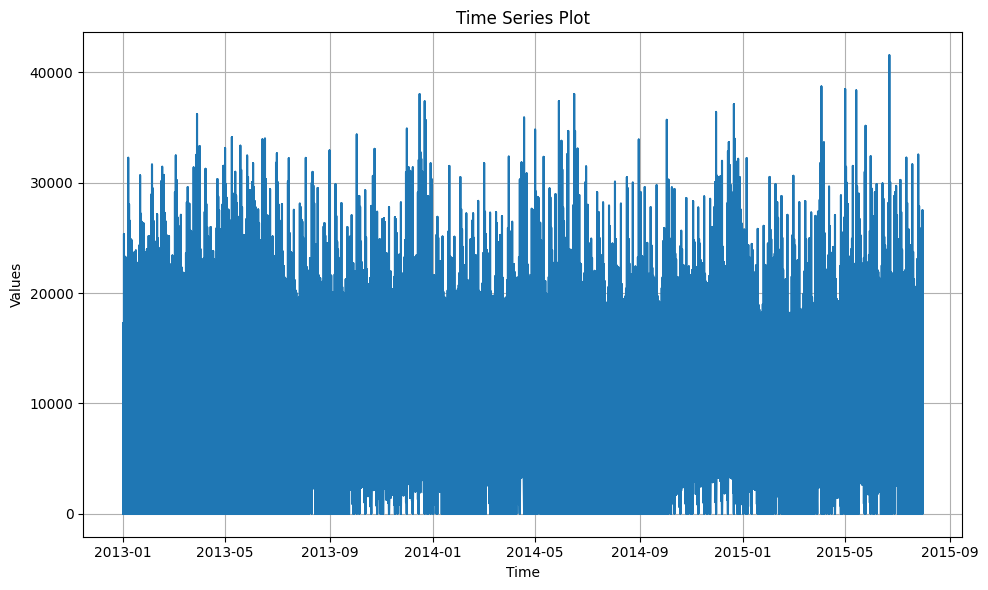

In [61]:
from src.utils import plot_time_series
plot_time_series(df_train['Date'], df_train['Sales'])

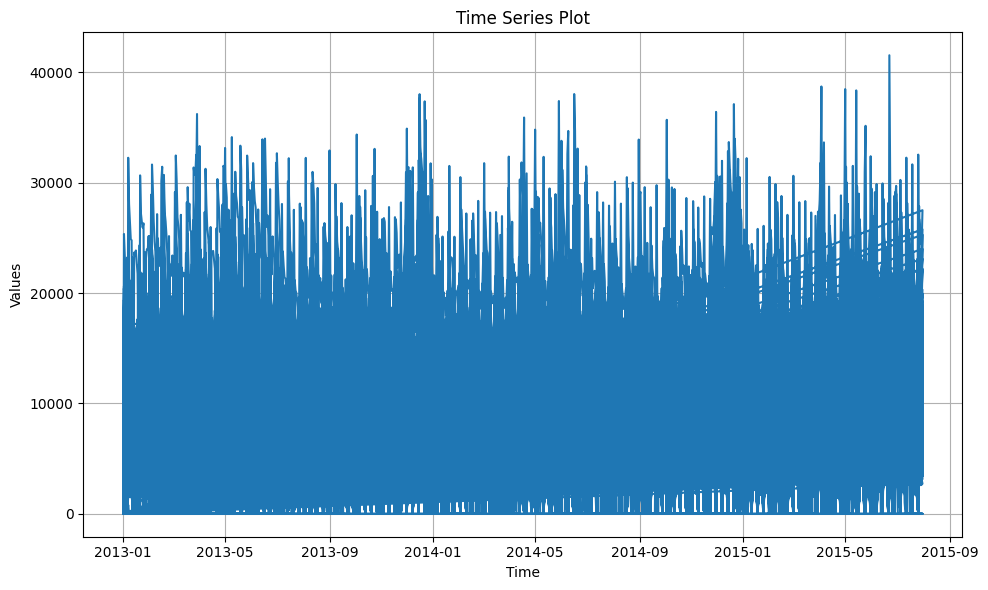

In [62]:
plot_time_series(df_full['Date'], df_full['Sales'])

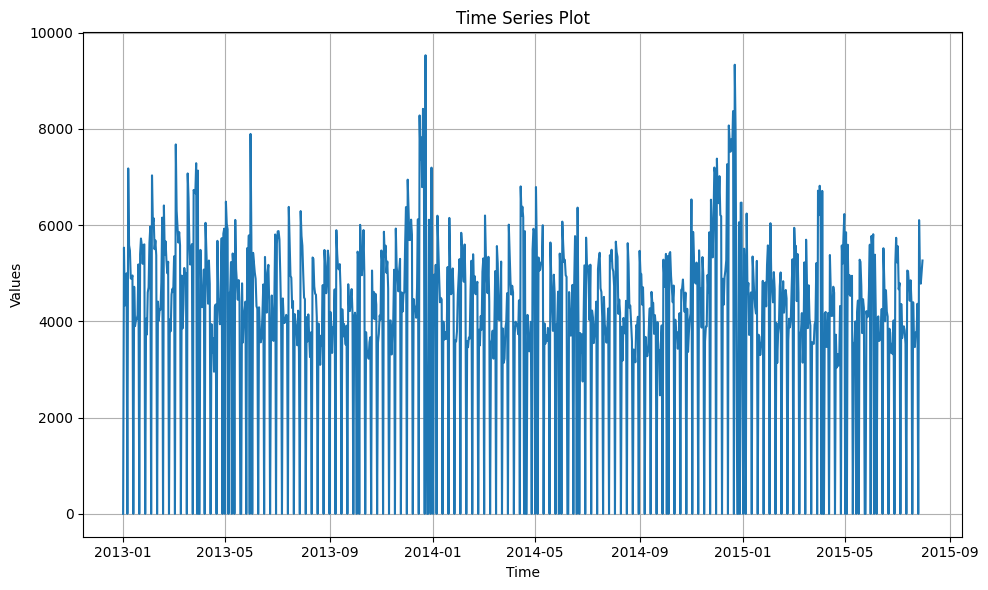

In [63]:
first_store_data = df_train[df_train['Store'] == 1]
plot_time_series(first_store_data['Date'], first_store_data['Sales'])

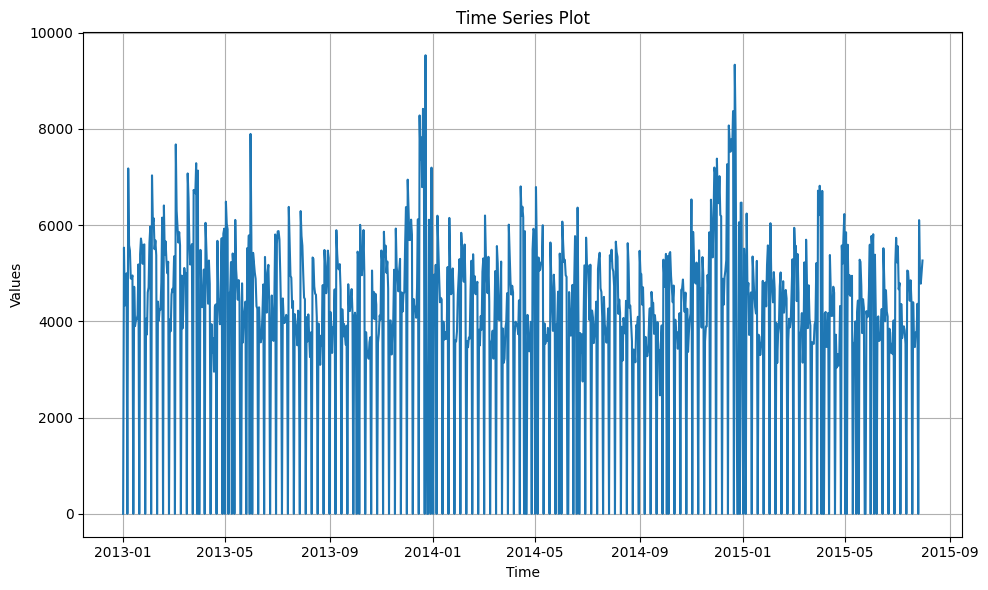

In [64]:
first_store_data = df_full[df_full['Store'] == 1]
plot_time_series(first_store_data['Date'], first_store_data['Sales'])

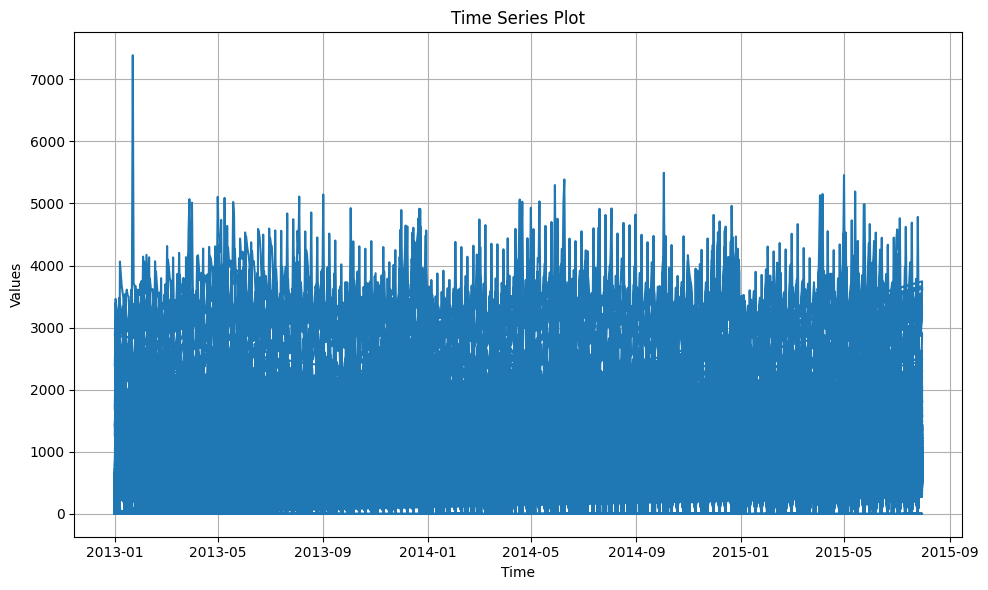

In [65]:
plot_time_series(df_full['Date'], df_full['Customers'])

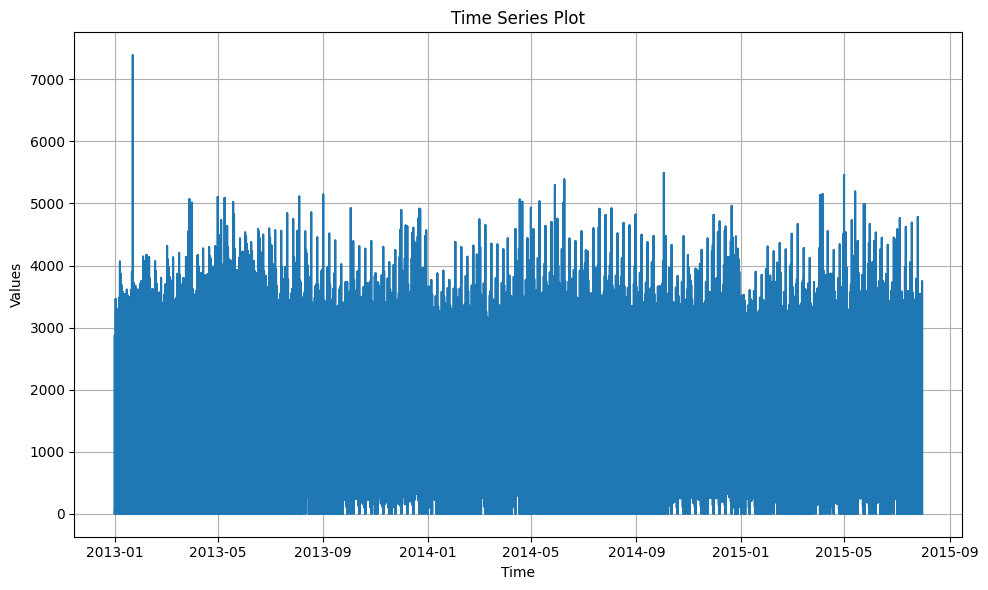

In [66]:
plot_time_series(df_train['Date'], df_train['Customers'])

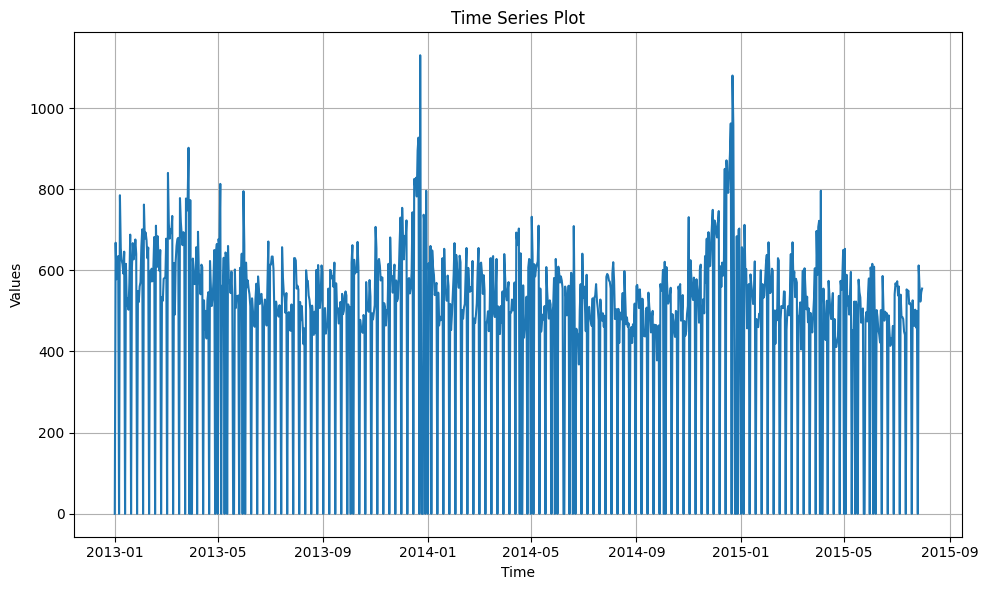

In [67]:
first_store_data = df_full[df_full['Store'] == 1]
plot_time_series(first_store_data['Date'], first_store_data['Customers'])

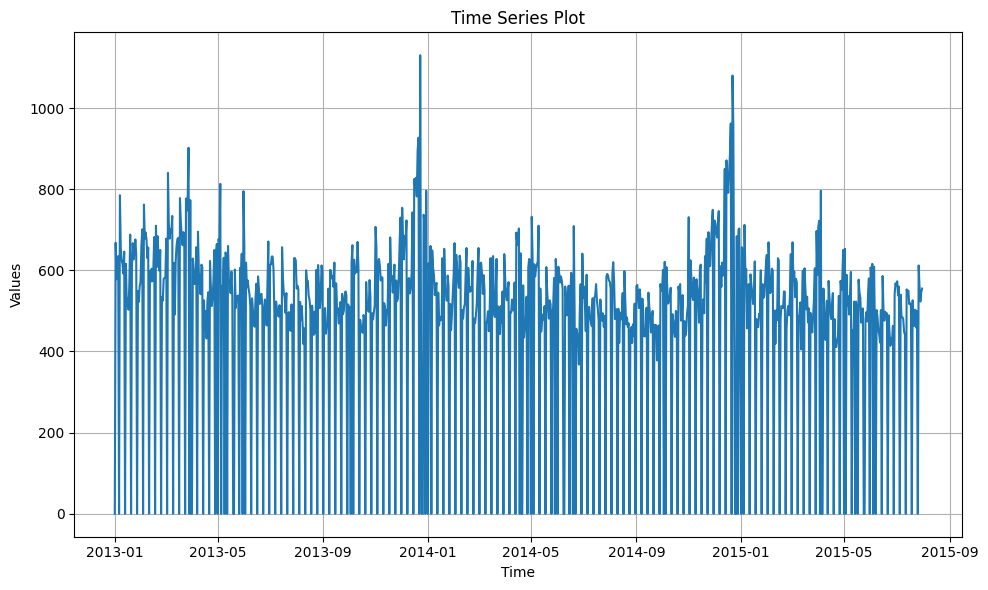

In [68]:
first_store_data = df_train[df_train['Store'] == 1]
plot_time_series(first_store_data['Date'], first_store_data['Customers'])

In [69]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050330 entries, 0 to 1050329
Data columns (total 10 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1050330 non-null  int64         
 1   Date           1050330 non-null  datetime64[ns]
 2   DayOfWeek      1017209 non-null  float64       
 3   Sales          1050330 non-null  float64       
 4   Customers      1050330 non-null  float64       
 5   Open           1050330 non-null  float64       
 6   Promo          1017209 non-null  float64       
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  float64       
 9   missing        1050330 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 73.1+ MB


#### Total Sales Over Time (All Stores)

<Axes: xlabel='Date'>

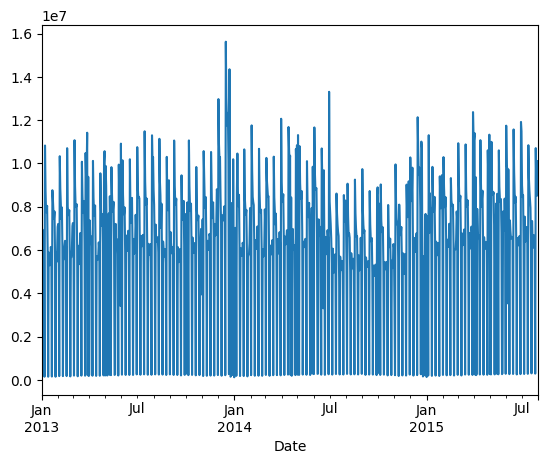

In [70]:
df_full.groupby('Date')['Sales'].sum().plot()


<Axes: xlabel='Date'>

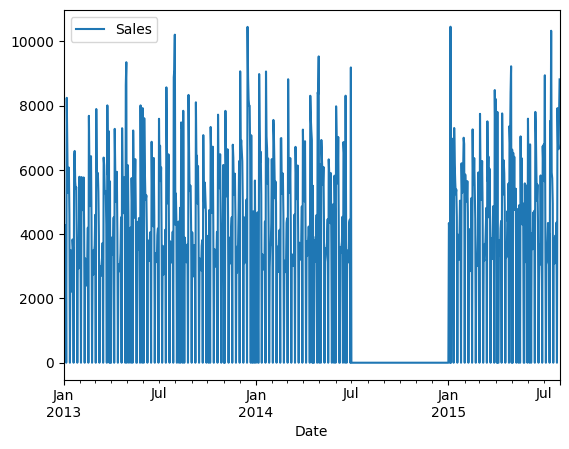

In [71]:
df_full[df_full['Store'] == 13].plot(x='Date', y='Sales')


### Rolling Decomposition

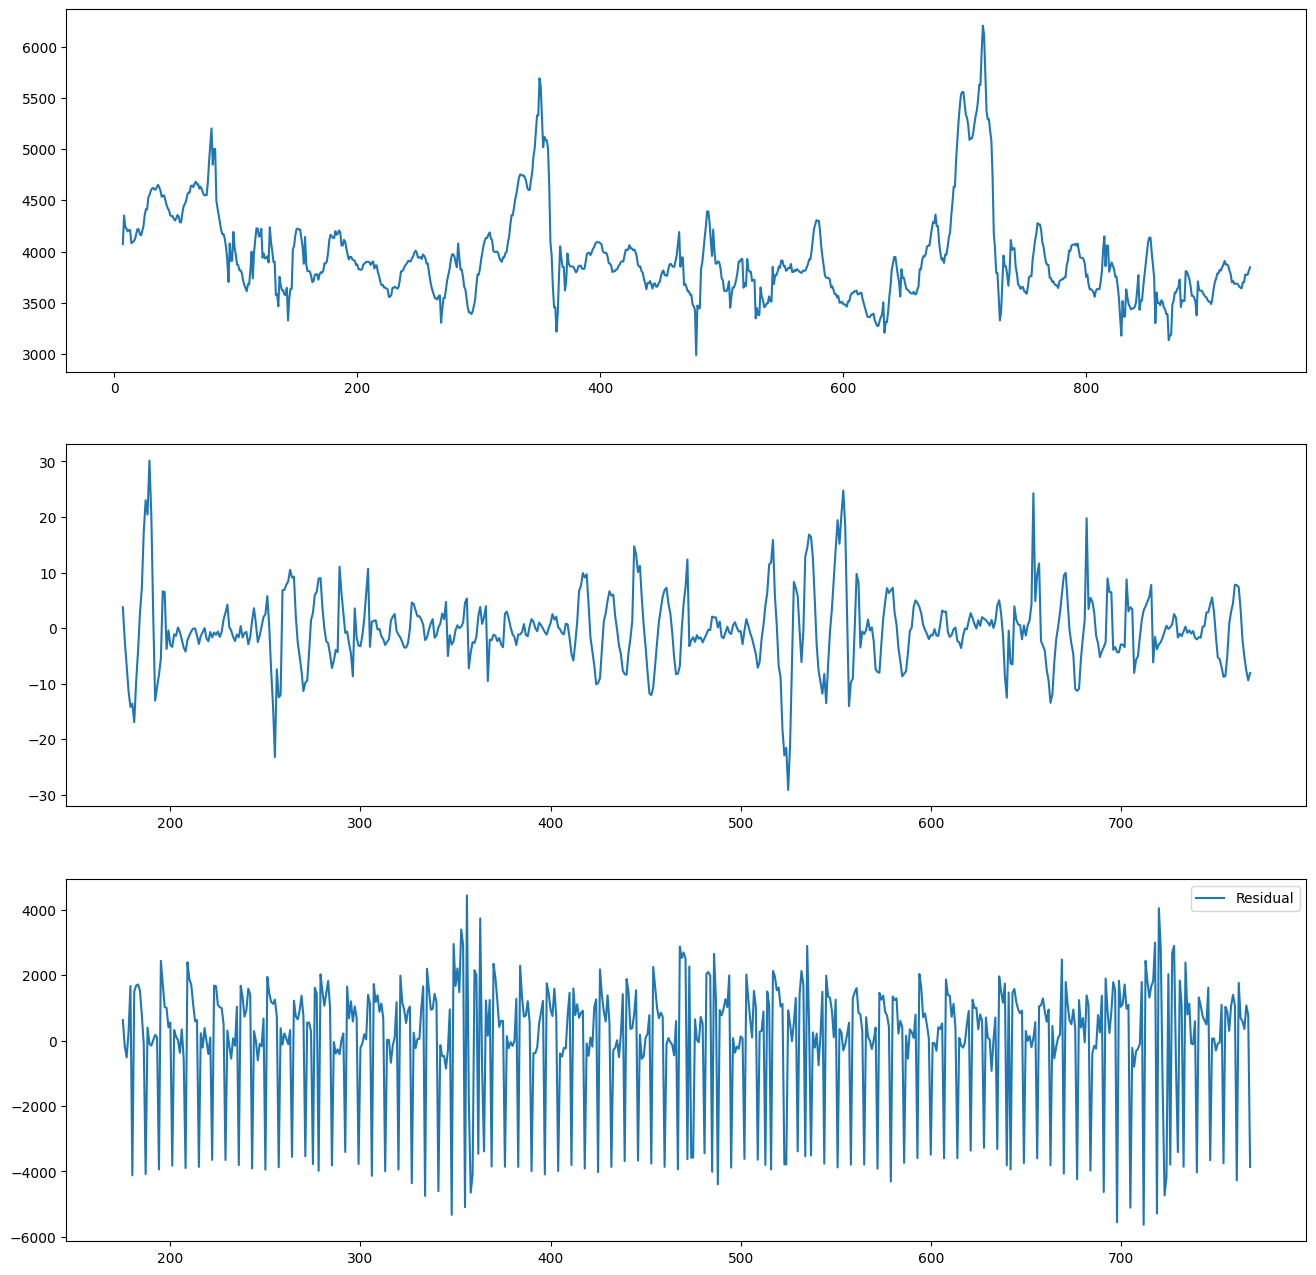

In [81]:
store_id = 1
df_store = df_full[df_full['Store'] == store_id].sort_values('Date')

trend = df_store['Sales'].rolling(window=14, center=True).mean()
detrend = df_store['Sales'] - trend
seasonal = detrend.rolling(window=48*7, center=True).mean()
residual = detrend - seasonal
fig, axs = plt.subplots(3, 1, figsize=(16, 16))
trend.plot(label='Trend', ax=axs[0])
seasonal.plot(label='Seasonal',ax=axs[1])
residual.plot(label='Residual',ax=axs[2])
plt.legend()

In [96]:
from statsmodels.nonparametric.smoothers_lowess import lowess

In [97]:
def plot_loess(ts_df, frac=0.05):
  ts_df['lowess_trend'] = lowess(ts_df['Sales'], range(len(ts_df['Sales'])), frac=0.05)[:, 1]
  fig, ax = plt.subplots(1, 1)
  ts_df['lowess_trend'].plot(ax=ax, label='LOESS Trend', linewidth=3)

  ax.set_xlabel('Time')
  ax.set_ylabel('Energy Consumption')
  ax.set_title('LOESS Trend Estimation')
  ax.legend()
  ax.grid(True)
  fig.tight_layout()
  plt.show()

plot_loess(df_full)

KeyboardInterrupt: 

## Data preprocessing and Feature Engineering

In [84]:
df_full.head()

,Store,Date,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,missing
0,1,2013-01-01,2.0,0.0,0.0,0.0,0.0,a,1.0,False
1,1,2013-01-02,3.0,5530.0,668.0,1.0,0.0,0,1.0,False
2,1,2013-01-03,4.0,4327.0,578.0,1.0,0.0,0,1.0,False
3,1,2013-01-04,5.0,4486.0,619.0,1.0,0.0,0,1.0,False
4,1,2013-01-05,6.0,4997.0,635.0,1.0,0.0,0,1.0,False


In [85]:
df_full.set_index('Date')

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,missing
Date,,,,,,,,,
2013-01-01,1,2.0,0.0,0.0,0.0,0.0,a,1.0,False
2013-01-02,1,3.0,5530.0,668.0,1.0,0.0,0,1.0,False
2013-01-03,1,4.0,4327.0,578.0,1.0,0.0,0,1.0,False
2013-01-04,1,5.0,4486.0,619.0,1.0,0.0,0,1.0,False
2013-01-05,1,6.0,4997.0,635.0,1.0,0.0,0,1.0,False
...,...,...,...,...,...,...,...,...,...
2015-07-27,1115,1.0,10712.0,608.0,1.0,1.0,0,1.0,False
2015-07-28,1115,2.0,8093.0,500.0,1.0,1.0,0,1.0,False
2015-07-29,1115,3.0,7661.0,473.0,1.0,1.0,0,1.0,False


In [88]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050330 entries, 0 to 1050329
Data columns (total 10 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1050330 non-null  int64         
 1   Date           1050330 non-null  datetime64[ns]
 2   DayOfWeek      1017209 non-null  float64       
 3   Sales          1050330 non-null  float64       
 4   Customers      1050330 non-null  float64       
 5   Open           1050330 non-null  float64       
 6   Promo          1017209 non-null  float64       
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  float64       
 9   missing        1050330 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 73.1+ MB


In [93]:
df_full['Year'] = df_full['Date'].dt.year.iloc[0]
df_full['Month'] = df_full['Date'].dt.month.iloc[0]
df_full['Day'] = df_full['Date'].dt.day.iloc[0]
df_full['WeekOfYear'] = df_full['Date'].dt.isocalendar().week.iloc[0]

# adding new variable
df_full['SalePerCustomer'] = df_full['Sales']/df_full['Customers']
df_full['SalePerCustomer'].describe()

count    844340.000000
mean          9.493619
std           2.197494
min           0.000000
25%           7.895563
50%           9.250000
75%          10.899729
max          64.957854
Name: SalePerCustomer, dtype: float64

In [94]:
df_full.head()

,Store,Date,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,missing,Year,Month,Day,WeekOfYear,SalePerCustomer
0,1,2013-01-01,2.0,0.0,0.0,0.0,0.0,a,1.0,False,2013,1,1,1,NaN
1,1,2013-01-02,3.0,5530.0,668.0,1.0,0.0,0,1.0,False,2013,1,1,1,8.278443
2,1,2013-01-03,4.0,4327.0,578.0,1.0,0.0,0,1.0,False,2013,1,1,1,7.486159
3,1,2013-01-04,5.0,4486.0,619.0,1.0,0.0,0,1.0,False,2013,1,1,1,7.247173
4,1,2013-01-05,6.0,4997.0,635.0,1.0,0.0,0,1.0,False,2013,1,1,1,7.869291


## Store Data

In [72]:
df_store = pd.read_csv("../data/store.csv",sep=',')

In [73]:
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
